# Data Preperation

## Data Source

In this project, we will be using daily precipitation measured in Seattle and New York from January 1, 2020 to January 1, 2024 as requested from the National Centers for Environmental Information [NOAA Climate Data](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) online search tool.


The data sets can be found at:

https://raw.githubusercontent.com/nguyenntina/Seattle-Weather/main/ny_rain.csv

https://raw.githubusercontent.com/nguyenntina/Seattle-Weather/main/seattle_rain.csv


## Introduction

In this notebook, we will be preparing our data to produce a clean data set that can be used to analyze whether it rains more in Seattle than in New York City.

## Import Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load Data Sets

Load the Seattle and New York data set.

In [113]:
df_seattle = pd.read_csv("https://raw.githubusercontent.com/nguyenntina/Seattle-Weather/main/seattle_rain.csv")
df_ny = pd.read_csv("https://raw.githubusercontent.com/nguyenntina/Seattle-Weather/main/ny_rain.csv")

## Contents of Dataset



Explore the contents included in each data set by looking at the first few rows and view statistical information.

In [114]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [115]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [116]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [117]:
df_ny.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


Something noticeable we see from both data sets is the presence of NaN values.

### Check For Column Equivalence

We can check if both data sets have the same columns.

In [118]:
set(df_seattle.columns) == set(df_ny.columns)

True

Both data sets do indeed have equivalent columns.

## Data Type

Here we check the types we have in our data set.

In [119]:
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [120]:
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

One variable that seems to be incorrectly encoded is "DATE". We see that its current type is object.

### Data Type Conversion

To use the "DATE" column properly, we will need to convert it to a datetime type.

In [121]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

### Data Type Check After Conversion

After converting the "DATE" type, we will check our data types again.

In [122]:
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [123]:
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

We have verified that "DATE" has been converted and that all our variables are of proper types.

## Remove Unnecessary Data

We can reduce our data set by removing any unnecessary columns that are not needed.

In [124]:
bad_cols = ["ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns=bad_cols)
df_ny = df_ny.drop(columns=bad_cols)

### Updated Data Set

In [125]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2020-01-01,0.22


In [126]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.00
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2020-01-01,0.06
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,2020-01-01,0.00
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,2020-01-01,0.00
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2020-01-01,0.00


After dropping unnecessary columns, we are left with "STATION", "NAME", "LATITUDE", "LONGITUDE", "DATE", and "PRCP".

## Picking A Single Station

To deal with the mismatch number of stations in the data sets, we will select one from each data set.

We will identify stations that are within each data set.

In [127]:
df_seattle["NAME"].unique()

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)

In [128]:
df_ny["NAME"].unique()

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US', 'FLORAL PARK 0.4 W, NY US',
       'CENTERPORT 0.9 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US',
       'QUEENS 4.7 SW, NY US', 'THORNWOOD 0.7 NW, NY US',
       'STATEN ISLAND 2.6 N, NY US',
       'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US',
       'NEW HEMPSTEAD 0.6 SE, NY US', 'LITTLE NECK 0.3 SE, NY US',
       'ALBERTSON 0.5 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US',
       'LINDENHURST 1.0 NE, NY US', 'EAST ROCKAWAY 0.5 S, NY US'],
      dtype=object)

In [129]:
df_seatac = df_seattle.loc[df_seattle["NAME"] == "SEATTLE TACOMA AIRPORT, WA US"]
df_jfk = df_ny.loc[df_ny["NAME"] == "JFK INTERNATIONAL AIRPORT, NY US"]

Since we have airport stations in both data set, we will be selecting those and creating new data frames that only include data from those stations.

## Correct Data Amount

We expect there to be 1461 days as calculated by: 4 x 365 + 1

## Identify Missing Values

To have a comparable data set, we should check that we have the correct and equal amount of data between the two data frames.

In [130]:
print(df_seatac.shape)
print(df_jfk.shape)

(1366, 6)
(1462, 6)


<Axes: >

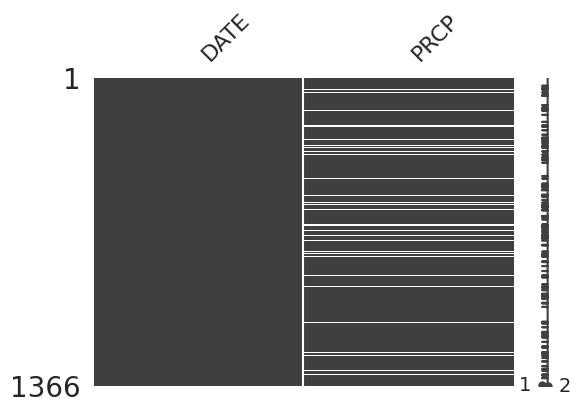

In [131]:
msno.matrix(df_seatac[['DATE','PRCP']], figsize=(6, 4))

The Seatac data set is missing some days and the JFK has an extra day. From the matrix, we can also visualize the NaNs in the Seatac data set however, this doesn't show the exact missing dates.

## Join Data Frames

We will join the Seattle and New York data frames, keeping only the "DATE" and "PRCP" columns.

Since JFK has data for all the dates, we will perform a left joing using JFK as the left data set. Before doing so, we should drop any duplicate dates.

In [132]:
df_jfk = df_jfk.drop_duplicates(subset="DATE")
df_seatac = df_seatac.drop_duplicates(subset="DATE")

In [133]:
df = df_jfk[['DATE', 'PRCP']].merge(df_seatac[['DATE', 'PRCP']], on='DATE', how='left')

In [134]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.00,0.00
1,2020-01-02,0.00,0.21
2,2020-01-03,0.13,0.39
3,2020-01-04,0.16,0.10
4,2020-01-05,0.00,0.14


After preforming the join, we have two PRCP columns differentiated by _x and _y suffixes.

## Tidy Data Frame

Instead of having two columns for precipitation, we want want to convert our data frame to a tidy format where each variable has one column.

In [135]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [136]:
df.head()

,DATE,CITY,PRCP
0,2020-01-01,PRCP_x,0.00
1,2020-01-02,PRCP_x,0.00
2,2020-01-03,PRCP_x,0.13
3,2020-01-04,PRCP_x,0.16
4,2020-01-05,PRCP_x,0.00


Now we have one column representing precipitation values instead of two columns.

## Rename Columns and Values

We should rename our columns and values to follow best practices.

In [137]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'NYC'
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [138]:
df.head()

,DATE,CITY,PRCP
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00


In [139]:
df.tail()

,DATE,CITY,PRCP
2917,2023-12-27,SEA,0.1
2918,2023-12-28,SEA,NaN
2919,2023-12-29,SEA,0.0
2920,2023-12-30,SEA,0.1
2921,2023-12-31,SEA,0.0


In [140]:
mapping_dict = {'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'}

In [141]:
df = df.rename(columns=mapping_dict)

In [142]:
df.head()

,date,city,precipitation
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00


Our columns now follow best practice and our values in the city columns are now descriptive.

## Deal With Missing Values

We have previously identified that we had missing data within our Seatac data set so we will impute any missing data.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2690 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


<Axes: >

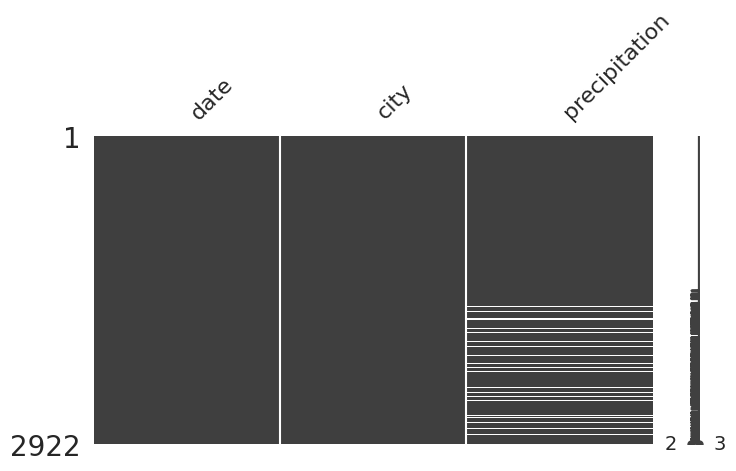

In [144]:
msno.matrix(df, figsize = (8, 4))

From the matrix, we see that the bottom half of the precipitation column is when the NaN values start to appear. This is because the first half of the data set are JFK rows and the second half are Seatac rows.

### Impute Missing Values

We will use linear interpolation to fill in NaNs.

In [145]:
df["precipitation"] = df["precipitation"].interpolate()

In [146]:
df["precipitation"].isna().sum()

0

We now have a data set, with all dates provided and zero NaN values.

## Export Clean .csv File

Our data set is now ready to be converted to a .csv file for further analysis.

In [147]:
df.to_csv('clean_seattle_nyc_weather.csv', index=False)